Potential resource(s):
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

# Mental Health in Tech Project

## Data Sets

[OSMI Survey on Mental Health in the Tech Workplace in 2014](https://www.kaggle.com/osmi/mental-health-in-tech-survey) 

["Ongoing" OSMI survey from 2016](https://data.world/kittybot/osmi-mental-health-tech-2016)


## Questions

What factors are most signficant in influencing whether or not a person believes disclosing a mental health issue would have negative consequences?

Can we predict, based on publicly available features of a person and company, whether that person is likely to beleive disclosing a mental health issue would be harmful for their career?

## Exploring and Cleaning 2016 Data

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
df16 = pd.read_csv("./datasets/2016/mental-health-in-tech-2016_20161114.csv")
print df16.shape
df16.head(3)

(1433, 63)


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always


In [4]:
# rename columns to match 2014 data set and shorter names
question_col_map = {
    'Are you self-employed?': 'self_employed',
    'How many employees does your company or organization have?': 'num_employees',
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Is your primary role within your company related to tech/IT?': 'tech_role',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'care_options',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_program',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'seek_help',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'leave',  
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'mental_health_consequence',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'phys_health_consequence',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'coworkers',  # "comfortable" updated from "willing"
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'supervisor',  # "comfortable" updated from "willing"
    'Do you feel that your employer takes mental health as seriously as physical health?': 'mental_vs_physical',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'obs_consequence',
    'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xc2\xa0mental health issues?': 'insurance',
    'Do you know local or online resources to seek help for a mental health disorder?': 'know_resources',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'revealed_contacts',
    'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'revealed_contacts_consequence',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'revealed_coworkers',
    'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'revealed_coworkers_consequence',
    'Do you believe your productivity is ever affected by a mental health issue?': 'productivity_impacted',  # close to 'work_interfere'
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'percent_time_impacted',
    'Do you have previous employers?': 'prev_employer',
    'Have your previous employers provided mental health benefits?': 'prev_benefits',
    'Were you aware of the options for mental health care provided by your previous employers?': 'prev_care_options',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'prev_wellness_program',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'prev_seek_help',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'prev_anonymity',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'prev_mental_health_consequence',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'prev_phys_health_consequence',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'prev_coworkers',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'prev_supervisor',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'prev_mental_vs_physical',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'prev_obs_consequence',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'phys_health_interview',
    'Why or why not?': 'phys_health_interview_comment',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'mental_health_interview',
    'Why or why not?.1': 'mental_health_interview_comment',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'hurt_career',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'viewed_negatively',
    'How willing would you be to share with friends and family that you have a mental illness?': 'friends_family',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'obs_negative_response',  # close to 'obs_consequence'
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'reluctant_due_to_obs',
    'Do you have a family history of mental illness?': 'family_history',
    'Have you had a mental health disorder in the past?': 'past_disorder',
    'Do you currently have a mental health disorder?': 'current_disorder',
    'If yes, what condition(s) have you been diagnosed with?': 'current_diagnosed_conditions',
    'If maybe, what condition(s) do you believe you have?': 'current_believed_conditions',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'professional_diagnosed',
    'If so, what condition(s) were you diagnosed with?': 'professional_diagnoses',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'treatment',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'work_interfere_treated',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'work_interfere_untreated',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you live in?': 'live_in_country',
    'What US state or territory do you live in?': 'live_in_state',
    'What country do you work in?': 'work_in_country',
    'What US state or territory do you work in?': 'work_in_state',
    'Which of the following best describes your work position?': 'position',
    'Do you work remotely?': 'remote_work'  # previously asked at least 50% of time
}
df16.rename(columns=question_col_map, inplace=True)
df16.head(3)

,self_employed,num_employees,tech_company,tech_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,work_interfere_treated,work_interfere_untreated,age,gender,live_in_country,live_in_state,work_in_country,work_in_state,position,remote_work
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always


In [5]:
col_question_map = { question_col_map[q]: q for q in question_col_map.keys()}
col_question_map

{'age': 'What is your age?',
 'anonymity': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'benefits': 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'care_options': 'Do you know the options for mental health care available under your employer-provided coverage?',
 'coworkers': 'Would you feel comfortable discussing a mental health disorder with your coworkers?',
 'current_believed_conditions': 'If maybe, what condition(s) do you believe you have?',
 'current_diagnosed_conditions': 'If yes, what condition(s) have you been diagnosed with?',
 'current_disorder': 'Do you currently have a mental health disorder?',
 'family_history': 'Do you have a family history of mental illness?',
 'friends_family': 'How willing would you be to share with friends and family that you have a mental illness?',
 'gender': 'What is your gender?',
 'hurt_career': 'Do you fee

<details><summary> Click to expand all **original questions/fields** </summary>
- Are you self-employed?  
- How many employees does your company or organization have?  
- Is your employer primarily a tech company/organization?  
- Is your primary role within your company related to tech/IT?  
- Does your employer provide mental health benefits as part of healthcare coverage?  
- Do you know the options for mental health care available under your employer-provided coverage?  
- Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  
- Does your employer offer resources to learn more about mental health concerns and options for seeking help?  
- Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?  
- If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  
- Do you think that discussing a mental health disorder with your employer would have negative consequences?  
- Do you think that discussing a physical health issue with your employer would have negative consequences?  
- Would you feel comfortable discussing a mental health disorder with your coworkers?  
- Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?  
- Do you feel that your employer takes mental health as seriously as physical health?  
- Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  
- Do you have medical coverage (private insurance or state-provided) which includes treatment of \xc2\xa0mental health issues?  
- Do you know local or online resources to seek help for a mental health disorder?  
- If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?  
- If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?  
- If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?  
- If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?  
- Do you believe your productivity is ever affected by a mental health issue?  
- If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?  
- Do you have previous employers?  
- Have your previous employers provided mental health benefits?  
- Were you aware of the options for mental health care provided by your previous employers?  
- Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  
- Did your previous employers provide resources to learn more about mental health issues and how to seek help?  
- Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?  
- Do you think that discussing a mental health disorder with previous employers would have negative consequences?  
- Do you think that discussing a physical health issue with previous employers would have negative consequences?  
- Would you have been willing to discuss a mental health issue with your previous co-workers?  
- Would you have been willing to discuss a mental health issue with your direct supervisor(s)?  
- Did you feel that your previous employers took mental health as seriously as physical health?  
- Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?  
- Would you be willing to bring up a physical health issue with a potential employer in an interview?  
- Why or why not?  
- Would you bring up a mental health issue with a potential employer in an interview?  
- Why or why not?.1  
- Do you feel that being identified as a person with a mental health issue would hurt your career?  
- Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?  
- How willing would you be to share with friends and family that you have a mental illness?  
- Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?  
- Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?  
- Do you have a family history of mental illness?  
- Have you had a mental health disorder in the past?  
- Do you currently have a mental health disorder?  
- If yes, what condition(s) have you been diagnosed with?  
- If maybe, what condition(s) do you believe you have?  
- Have you been diagnosed with a mental health condition by a medical professional?  
- If so, what condition(s) were you diagnosed with?  
- Have you ever sought treatment for a mental health issue from a mental health professional?  
- If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?  
- If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?  
- What is your age?  
- What is your gender?  
- What country do you live in?  
- What US state or territory do you live in?  
- What country do you work in?  
- What US state or territory do you work in?  
- Which of the following best describes your work position?  
- Do you work remotely?  
</details>

In [6]:
df16['care_options']

0                 NaN
1                 Yes
2                 NaN
3                 NaN
4                 Yes
5       I am not sure
6                  No
7                 Yes
8                  No
9                 NaN
10      I am not sure
11                Yes
12      I am not sure
13                Yes
14                Yes
15                 No
16                 No
17                 No
18                NaN
19                 No
20                NaN
21                 No
22                Yes
23                Yes
24                NaN
25                Yes
26                 No
27                 No
28                 No
29                NaN
            ...      
1403    I am not sure
1404              NaN
1405    I am not sure
1406               No
1407    I am not sure
1408              NaN
1409              Yes
1410               No
1411    I am not sure
1412    I am not sure
1413              Yes
1414              Yes
1415    I am not sure
1416               No
1417      

#### Quick NaN Check


In [6]:
# NaN check
counts = df16.count()
numrows = df16.shape[0]
for col in df16.columns:
    if counts[col] != numrows:
        print "{0}\n\t{1} NaNs\t\t{2} values".format(col, numrows-counts[col], counts[col])

num_employees
	287 NaNs		1146 values
tech_company
	287 NaNs		1146 values
tech_role
	1170 NaNs		263 values
benefits
	287 NaNs		1146 values
care_options
	420 NaNs		1013 values
wellness_program
	287 NaNs		1146 values
seek_help
	287 NaNs		1146 values
anonymity
	287 NaNs		1146 values
leave
	287 NaNs		1146 values
mental_health_consequence
	287 NaNs		1146 values
phys_health_consequence
	287 NaNs		1146 values
coworkers
	287 NaNs		1146 values
supervisor
	287 NaNs		1146 values
mental_vs_physical
	287 NaNs		1146 values
obs_consequence
	287 NaNs		1146 values
insurance
	1146 NaNs		287 values
know_resources
	1146 NaNs		287 values
revealed_contacts
	1146 NaNs		287 values
revealed_contacts_consequence
	1289 NaNs		144 values
revealed_coworkers
	1146 NaNs		287 values
revealed_coworkers_consequence
	1146 NaNs		287 values
productivity_impacted
	1146 NaNs		287 values
percent_time_impacted
	1229 NaNs		204 values
prev_benefits
	169 NaNs		1264 values
prev_care_options
	169 NaNs		1264 values
prev_wellness_prog

In [7]:
df16[df16['revealed_coworkers'].isnull()].head(3)

,self_employed,num_employees,tech_company,tech_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,work_interfere_treated,work_interfere_untreated,age,gender,live_in_country,live_in_state,work_in_country,work_in_state,position,remote_work
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always


In [8]:
def preview_col(df, col):
    print col
    if col in col_question_map:
        print col_question_map[col]
    print df[col].value_counts(dropna=False)

### Ages

This is supposed to be a survey of working adults, so values under 16 and over 80 can be ignored.

In [9]:
ages = df16.age.unique()
ages.sort()
print ages

[  3  15  17  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  61  62  63  65  66  70  74  99 323]


In [10]:
nan = float('NaN')

df16.age = df16.age.map(lambda x: nan if (x<16 or x>80) else x)

In [11]:
ages = df16.age.unique()
ages.sort()
print ages

[ 17.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.
  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  61.  62.  63.
  65.  66.  70.  74.  nan]


In [12]:
# def nan_cols_out_of_range(data, col, rmin, rmax):
#     data[col] = data[col].map(lambda x: np.nan if (x<rmin or x>rmax) else x)

# agemin = 16
# agemax = 80

# nan_cols_out_of_range(df14, 'age', agemin, agemax)
# nan_cols_out_of_range(df16, 'age', agemin, agemax)

### Gender responses

Gender responses seem to be strings entered by the user. To create a more manageable set of variables, I examine all the gender responses and categorize them into `female`, `male`, or `other`.  

Note (and it's noted in a comment in the code) that trans men and women map to `male` and `female` categories, respectively. Gender identity can have an impact on feelings of being stigmatized, so this might be a decision to explore further. 

In [13]:
# create dictionary to organize dummy data frames throughout
dummy_dfs = {}

In [14]:
print df16.gender.unique()

['Male' 'male' 'Male ' 'Female' 'M' 'female' 'm' 'I identify as female.'
 'female ' 'Bigender' 'non-binary' 'Female assigned at birth ' 'F' 'Woman'
 'man' 'fm' 'f' 'Cis female ' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Female ' 'woman' 'female/woman' 'Cis male'
 'Male.' 'Androgynous' 'male 9:1 female, roughly' nan 'Male (cis)' 'Other'
 'nb masculine' 'Cisgender Female' 'Man' 'Sex is male'
 'none of your business' 'genderqueer' 'cis male' 'Human' 'Genderfluid'
 'Enby' 'Malr' 'genderqueer woman' 'mtf' 'Queer' 'Agender' 'Dude' 'Fluid'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "
 'mail' 'M|' 'Male/genderqueer' 'fem' 'Nonbinary' 'male ' 'human'
 'Female (props for making this a freeform field, though)' ' Female'
 'Unicorn' 'Cis Male' 'Male (trans, FtM)' 'Cis-woman' 'Genderqueer'
 'cisdude' 'Genderflux demi-girl' '

In [14]:
# categorize gender responses into male, female, other based on response
def categorize_gender(gender_response):
    if type(gender_response) != str:
        return 'other'
    gender_response = gender_response.strip().lower()
    

    male_responses = {
        'cis male', 'cis man', 'cisdude', 'dude',
        "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
        'm', 'mail', 'maile', 'make', 'mal', 'male', 'male (cis)', 'male (trans)',
        'male (trans, ftm)', 'male.', 'malr', 'man', 'msle', 'm|'
    }
    
    
    female_responses = {
        'cis female', 'cis-female/femme', 'cis-woman', 'cisgender female', 'f',
        'femail', 'femake', 'female', 'female (cis)', 'female assigned at birth',
        'female (props for making this a freeform field, though)', 'female (trans)',
        'female/woman', 'fem', 'fm', 'i identify as female.', 'mtf', 'trans woman', 
        'trans-female', 'transgender woman', 'transitioned, m2f', 'woman'
    }
    if gender_response in male_responses:
        return 'male'
    elif gender_response in female_responses:
        return 'female'
    else:
        print gender_response
        return 'other'


In [15]:
categorized_gender_responses = df16.gender.map(categorize_gender)

bigender
non-binary
genderfluid (born female)
other/transfeminine
female or multi-gender femme
androgynous
male 9:1 female, roughly
other
nb masculine
sex is male
none of your business
genderqueer
human
genderfluid
enby
genderqueer woman
queer
agender
fluid
non-binary
male/genderqueer
nonbinary
human
nonbinary
unicorn
genderqueer
non-binary
genderflux demi-girl
female-bodied; no feelings about gender
afab
agender
non-binary


In [17]:
categorized_gender_responses.value_counts(dropna=False)

male      1056
female     337
other       40
Name: gender, dtype: int64

In [18]:
dummy_dfs['gender'] = pd.get_dummies(categorized_gender_responses, prefix='gender')

In [19]:
df16.loc[:,'gender_category'] = categorized_gender_responses

In [20]:
df16[['gender', 'gender_category']].tail(3)

,gender,gender_category
1430,Male,male
1431,Female,female
1432,non-binary,other


In [21]:
df16['gender_category'].value_counts()

male      1056
female     337
other       40
Name: gender_category, dtype: int64

### Yes/no questions

Many of the survey questions are yes/no questions, but the data is currently stored as strings. I convert these to `1` for `Yes` and `0` for `No`.

Most of the columns with three reponses have `'Yes'`, `'No'`, and `'Maybe'`, `'Don't know'`, or some other meaningful third option.  Those will be one-hot coded with dummy variables later.

In [22]:
for col in df16.columns:
    col_uniq = df16[col].unique()
    if len(col_uniq) == 2:
        print col, col_uniq

self_employed [0 1]
prev_employer [1 0]
professional_diagnosed ['Yes' 'No']
treatment [0 1]


In [23]:
def yes_no_same(response):
    if response=='Yes' or response==1:
        return 1
    elif response=='No' or response==0:
        return 0
    else:
        return response

In [24]:
def yes_no_same_column(df, column_name):
    df[column_name] = df[column_name].map(yes_no_same)

In [98]:
two_opt_cols = ['prev_employer', 'professional_diagnosed', 'treatment']
for col in two_opt_cols:
    yes_no_same_column(df16, col)

In [26]:
df16[two_opt_cols].head(3)

,prev_employer,professional_diagnosed,treatment,self_employed
0,1,1,0,0
1,1,1,1,0
2,1,0,1,0


#### Colums with 2 options and nan

In [99]:
two_opt_with_nans = ['tech_company', 'self_employed', 'tech_role', 'obs_consequence', 'insurance']

In [100]:
for col in two_opt_with_nans:
    df16[col] = df16[col].map(yes_no_same)
    print df16[col].value_counts(dropna=False)

 1.0    883
NaN     287
 0.0    263
Name: tech_company, dtype: int64
0    1146
1     287
Name: self_employed, dtype: int64
NaN     1170
 1.0     248
 0.0      15
Name: tech_role, dtype: int64
 0.0    1048
NaN      287
 1.0      98
Name: obs_consequence, dtype: int64
NaN     1146
 1.0     185
 0.0     102
Name: insurance, dtype: int64


In [29]:
# for col in two_opt_with_nans:
#     dummy_dfs[col] = pd.get_dummies(df[col], prefix=col, dummy_na=True)

In [30]:
df16[two_opt_with_nans].head(5)

,tech_company,tech_role,obs_consequence,insurance
0,1.0,NaN,0.0,NaN
1,1.0,NaN,0.0,NaN
2,1.0,NaN,0.0,NaN
3,NaN,NaN,NaN,1.0
4,0.0,1.0,0.0,NaN


### Yes/no/maybe and other three-option columns

Many of the survey questions have yes/no/maybe or other meaningful third choices.  These columns will need one-hot coding and dummy variables.

#### Three Option Columns

In [31]:
three_opt_cols = [col for col in df16.columns if len(df16[col].unique()) == 3]

for col in three_opt_cols:
    print col, df16[col].unique()

tech_company [  1.  nan   0.]
tech_role [ nan   1.   0.]
obs_consequence [  0.  nan   1.]
insurance [ nan   1.   0.]
phys_health_interview ['Maybe' 'Yes' 'No']
mental_health_interview ['Maybe' 'No' 'Yes']
family_history ['No' 'Yes' "I don't know"]
past_disorder ['Yes' 'Maybe' 'No']
current_disorder ['No' 'Yes' 'Maybe']
remote_work ['Sometimes' 'Never' 'Always']
gender_category ['male' 'female' 'other']


In [32]:
def get_prefix(response):
    if type(response) != str:
        return response
    else:
        return response.lower().replace(" ", "_").replace("'", "")

In [33]:
true_three_opts = [
    'phys_health_interview', 
    'mental_health_interview', 
    'family_history', 
    'past_disorder', 
    'current_disorder', 
    'remote_work'
]

In [34]:
df16.replace({"I don't know": 'dont know'}, inplace=True)

In [35]:
for col in true_three_opts:
    df16[col] = df16[col].map(get_prefix)
    print df16[col].unique()

['maybe' 'yes' 'no']
['maybe' 'no' 'yes']
['no' 'yes' 'dont_know']
['yes' 'maybe' 'no']
['no' 'yes' 'maybe']
['sometimes' 'never' 'always']


In [36]:
for col in true_three_opts:
    dummy_dfs[col] = pd.get_dummies(df16[col], prefix=col)

In [37]:
dummy_dfs.keys()

['past_disorder',
 'family_history',
 'gender',
 'remote_work',
 'mental_health_interview',
 'phys_health_interview',
 'current_disorder']

In [38]:
df16[true_three_opts].head(5)


,phys_health_interview,mental_health_interview,family_history,past_disorder,current_disorder,remote_work
0,maybe,maybe,no,yes,no,sometimes
1,maybe,no,yes,yes,yes,never
2,yes,yes,no,maybe,no,always
3,yes,maybe,no,yes,yes,sometimes
4,maybe,no,yes,yes,yes,sometimes


**At this point**, the `dummy_dfs` dictionary holds dummy variable sets for all three-option columns and `gender`.

In [39]:
dummy_dfs['remote_work'].head()

,remote_work_always,remote_work_never,remote_work_sometimes
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1


### Other categorical variables

In [40]:
def prefix_dummies(df, col, use_na=False):
    df[col] = df[col].map(get_prefix)
    dummy_dfs[col] = pd.get_dummies(df[col], prefix=col, dummy_na=use_na)

In [41]:
dummy_dfs.keys()

['past_disorder',
 'family_history',
 'gender',
 'remote_work',
 'mental_health_interview',
 'phys_health_interview',
 'current_disorder']

#### If you have a mental health issue, do you feel that it interferes with your work?

In [42]:
preview_col(df16, 'work_interfere_treated')
print
preview_col(df16, 'work_interfere_untreated')

work_interfere_treated
If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
Not applicable to me    557
Sometimes               369
Rarely                  322
Never                   120
Often                    65
Name: work_interfere_treated, dtype: int64

work_interfere_untreated
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
Often                   538
Not applicable to me    468
Sometimes               363
Rarely                   52
Never                    12
Name: work_interfere_untreated, dtype: int64


In [43]:
df16.replace({'Not applicable to me': 'doesnt apply'}, inplace=True)

In [44]:
prefix_dummies(df16, 'work_interfere_treated')
prefix_dummies(df16, 'work_interfere_untreated')


#### How many employees does your company or organization have?

In [45]:
preview_col(df16, 'num_employees')

num_employees
How many employees does your company or organization have?
26-100            292
NaN               287
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: num_employees, dtype: int64


In [46]:
df16.num_employees = df16.num_employees.map(lambda x: '1000+' if x=='More than 1000' else x)
print df16.num_employees.unique()

['26-100' '6-25' nan '1000+' '100-500' '500-1000' '1-5']


In [47]:
dummy_dfs['num_employees'] = pd.get_dummies(df16.num_employees, prefix='num_employees', dummy_na=True)
# dummy_dfs['num_employees'].head(3)

In [48]:
df16.num_employees = df16.num_employees.map(lambda x: '1000+' if x=='More than 1000' else x)
print df16.num_employees.unique()

['26-100' '6-25' nan '1000+' '100-500' '500-1000' '1-5']


In [49]:
df16.replace({
    "I don't know": 'dont_know',
    "I am not sure": "not_sure",
    "I'm not sure": 'dont_know',
    "United States of America": "United States",
    "Not applicable to me": "doesnt apply",
    'Not eligible for coverage / N/A': "doesnt_apply",
    "No, I don't know any": 'none',
    'Yes, I know several': 'several',
    'I know some': 'some',
    'No, because it would impact me negatively': 'no_due_to_negative_impact',
    'Sometimes, if it comes up': 'sometimes',
    "No, because it doesn't matter": 'no_due_to_doesnt_matter',
    'Yes, always': 'always',
    'No, none did': 'none',
    'Some did': 'some',
    'Yes, they all did': 'all',
    'I was aware of some': 'some',
    'Yes, I was aware of all of them': 'all',
    'No, I only became aware later': 'aware_later',
    'None did': 'none',
    'Yes, all of them': 'all',
    'None of them': 'none',
    'Some of them': 'some',
    'Some of my previous employers': 'some',
    'No, at none of my previous employers': 'none',
    'Yes, at all of my previous employers': 'all',
    'Maybe/Not sure': 'maybe',
    'Yes, I observed': 'observed',
    'Yes, I experienced': 'experienced',
    'Yes, I think it would': 'yes_would',
    "No, I don't think it would": 'no_wouldnt',
    'Yes, it has': 'yes has',
    'No, it has not': 'no hasnt',
    'Yes, I think they would': 'yes would',
    "No, I don't think they would": 'no wouldnt',
    'No, they do not': 'no dont',
    'Yes, they do': 'yes do',
    'N/A (not currently aware)': 'not_currently_aware',
    'Not applicable to me (I do not have a mental illness)': 'no mental illness'
    }, 
    inplace=True)


#### Country & State

In [50]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [51]:
state_abbr = { i[1]: i[0] for i in states.iteritems()}
# state_abbr

In [52]:
df16['live_in_state'].replace(state_abbr, inplace=True)
df16['work_in_state'].replace(state_abbr, inplace=True)

In [53]:
def get_state (row):
    if row['live_in_state'] == row['work_in_state']:
        return row['live_in_state']
    elif pd.notnull(row['live_in_state']) and pd.notnull(row['work_in_state']):
        return 'multi'
    else:
        return nan
df16['state'] = df16.apply(get_state, axis=1)
# df16['state'].value_counts(dropna=False)

In [54]:
df16['work_in_country'].replace({ 'United States of America': 'United States' }, inplace=True)
df16['live_in_country'].replace({ 'United States of America': 'United States' }, inplace=True)

In [55]:
# df16_country_set = set(df16['live_in_country'].unique()).union(set(df16['work_in_country'].unique()))
# # df16_country_set
# df14_country_set = set(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
#        'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
#        'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
#        'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
#        'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
#        'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
#        'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
#        'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
#        'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
#        'Czech Republic', 'Philippines'])
# df14_country_set
# df16_country_set ^ df14_country_set

In [56]:
def get_country (row):
    if row['live_in_country'] == row['work_in_country']:
        return row['live_in_country']
    elif pd.notnull(row['live_in_country']) and pd.notnull(row['work_in_country']):
        return 'multi'
    else:
        return nan
df16['country'] = df16.apply(get_country, axis=1)
df16['country'].value_counts(dropna=False)

United States             837
United Kingdom            178
Canada                     73
Germany                    57
Netherlands                47
Australia                  34
multi                      26
Sweden                     19
Ireland                    15
France                     14
Switzerland                10
Brazil                     10
New Zealand                 9
India                       9
Russia                      9
Bulgaria                    7
Finland                     7
Denmark                     7
Belgium                     5
Austria                     4
South Africa                4
Poland                      4
Romania                     3
Italy                       3
Spain                       3
Czech Republic              3
Chile                       3
Norway                      3
Mexico                      2
Israel                      2
Bosnia and Herzegovina      2
Pakistan                    2
Estonia                     2
Colombia  

In [57]:
# live_countries = df16['live_in_country'].map(get_prefix)
# print live_countries.head(3)

In [58]:
# dummy_dfs['live_in_country'] = pd.get_dummies(live_countries, prefix='live_in')
# dummy_dfs['live_in_country'].head(3)

In [59]:
# prefix_dummies(df16, 'live_in_state', True)

In [60]:
# dummy_dfs['live_in_state'].head(3)

In [61]:
# prefix_dummies(df16, 'work_in_state', True)
# prefix_dummies(df16, 'work_in_country')
# prefix_dummies(df16, 'country')

In [62]:
# dummy_dfs['country'].head(3)

#### If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:

In [63]:
v = preview_col

In [64]:
# x = df16[df16['mental_health_consequence'].isnull()].copy()
# print x.shape
# x.isnull().sum(axis=1).values
# x = x.dropna(axis=1)
# print x.shape
# print x.columns
# x.tail(3)

In [65]:
obj_cols = df16.columns[df16.dtypes==object]
print len(obj_cols)
long_cols = ['phys_health_interview_comment', 
             'mental_health_interview_comment',
             'professional_diagnoses',
             'position',
             'gender',
             'current_diagnosed_conditions',
             'current_believed_conditions',
             'country'
            ]
for col in long_cols:
    obj_cols = obj_cols.drop(col)
for col in obj_cols:
    prefix_dummies(df16, col, True)
#     v(df16, col)
# #     print col
# #     print df16[col].head(3)
#     print
# #     pass
print obj_cols

investigate = [
    'friends_family',
    'family_history',
    'mental_vs_physical'
]

57
Index([u'num_employees', u'benefits', u'care_options', u'wellness_program',
       u'seek_help', u'anonymity', u'leave', u'mental_health_consequence',
       u'phys_health_consequence', u'coworkers', u'supervisor',
       u'mental_vs_physical', u'know_resources', u'revealed_contacts',
       u'revealed_contacts_consequence', u'revealed_coworkers',
       u'revealed_coworkers_consequence', u'productivity_impacted',
       u'percent_time_impacted', u'prev_benefits', u'prev_care_options',
       u'prev_wellness_program', u'prev_seek_help', u'prev_anonymity',
       u'prev_mental_health_consequence', u'prev_phys_health_consequence',
       u'prev_coworkers', u'prev_supervisor', u'prev_mental_vs_physical',
       u'prev_obs_consequence', u'phys_health_interview',
       u'mental_health_interview', u'hurt_career', u'viewed_negatively',
       u'friends_family', u'obs_negative_response', u'reluctant_due_to_obs',
       u'family_history', u'past_disorder', u'current_disorder',
       u'work

## Exporting Cleaned Data


In [66]:
v(df16, 'reluctant_due_to_obs')

reluctant_due_to_obs
Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
NaN      776
yes      246
no       234
maybe    177
Name: reluctant_due_to_obs, dtype: int64


In [67]:
df = pd.concat(dummy_dfs.values(), axis=1)
df = pd.concat([df16, df], axis=1)
print df.shape

(1433, 532)


In [68]:
df16.head(3)

,self_employed,num_employees,tech_company,tech_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,gender,live_in_country,live_in_state,work_in_country,work_in_state,position,remote_work,gender_category,state,country
0,0,26-100,1.0,NaN,doesnt_apply,NaN,no,no,dont_know,very_easy,...,Male,united_kingdom,NaN,united_kingdom,NaN,Back-end Developer,sometimes,male,NaN,United Kingdom
1,0,6-25,1.0,NaN,no,yes,yes,yes,yes,somewhat_easy,...,male,united_states,il,united_states,il,Back-end Developer|Front-end Developer,never,male,il,United States
2,0,6-25,1.0,NaN,no,NaN,no,no,dont_know,neither_easy_nor_difficult,...,Male,united_kingdom,NaN,united_kingdom,NaN,Back-end Developer,always,male,NaN,United Kingdom


In [69]:
df.head(2)

,self_employed,num_employees,tech_company,tech_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,gender_category_other,gender_category_nan,remote_work_always,remote_work_never,remote_work_sometimes,remote_work_nan,phys_health_consequence_maybe,phys_health_consequence_no,phys_health_consequence_yes,phys_health_consequence_nan
0,0,26-100,1.0,NaN,doesnt_apply,NaN,no,no,dont_know,very_easy,...,0,0,0,0,1,0,0,1,0,0
1,0,6-25,1.0,NaN,no,yes,yes,yes,yes,somewhat_easy,...,0,0,0,1,0,0,0,1,0,0


In [70]:
df.to_csv(path_or_buf="./datasets/2016/clean-mental-health-in-tech-2016.csv")

In [71]:
df16.to_csv(path_or_buf="./datasets/2016/clean-no-dummies-2016.csv")

In [72]:
df16.columns

Index([u'self_employed', u'num_employees', u'tech_company', u'tech_role',
       u'benefits', u'care_options', u'wellness_program', u'seek_help',
       u'anonymity', u'leave', u'mental_health_consequence',
       u'phys_health_consequence', u'coworkers', u'supervisor',
       u'mental_vs_physical', u'obs_consequence', u'insurance',
       u'know_resources', u'revealed_contacts',
       u'revealed_contacts_consequence', u'revealed_coworkers',
       u'revealed_coworkers_consequence', u'productivity_impacted',
       u'percent_time_impacted', u'prev_employer', u'prev_benefits',
       u'prev_care_options', u'prev_wellness_program', u'prev_seek_help',
       u'prev_anonymity', u'prev_mental_health_consequence',
       u'prev_phys_health_consequence', u'prev_coworkers', u'prev_supervisor',
       u'prev_mental_vs_physical', u'prev_obs_consequence',
       u'phys_health_interview', u'phys_health_interview_comment',
       u'mental_health_interview', u'mental_health_interview_comment',
    

In [73]:
cdc = 'current_diagnosed_conditions'
cbc = 'current_believed_conditions'
pdc = 'professional_diagnoses'
df16[[cdc, cbc, pdc]].head()

,current_diagnosed_conditions,current_believed_conditions,professional_diagnoses
0,NaN,NaN,"Anxiety Disorder (Generalized, Social, Phobia,..."
1,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,..."
2,NaN,NaN,NaN
3,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,..."
4,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,..."


![position options in survey](role.png)

In [74]:
a = df16[[cdc, cbc, pdc, 'position']].head(100).copy()

In [75]:
a.head()

,current_diagnosed_conditions,current_believed_conditions,professional_diagnoses,position
0,NaN,NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",Back-end Developer
1,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",Back-end Developer|Front-end Developer
2,NaN,NaN,NaN,Back-end Developer
3,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",Supervisor/Team Lead
4,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",Executive Leadership|Supervisor/Team Lead|Dev ...


![conditions choices in survey](conditions.png)

In [76]:
import numpy as np
def get_strlist_col_unique(data, col):
    # create an array that includes all choices from strings
#     cd = 'choice_description'
    uniq_strs = data[col].unique()
    uniq = set([np.nan])
    for s in uniq_strs:
        if type(s) != str:
            pass
        else:
            slist = set(s.split('|'))
            uniq = uniq.union(slist)
    return uniq


In [77]:

survey_opts = { 
    'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Mood Disorder (Depression, Bipolar Disorder, etc)',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
    'Eating Disorder (Anorexia, Bulimia, etc)',
    'Attention Deficit Hyperactivity Disorder',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
    'Obsessive-Compulsive Disorder',
    'Post-traumatic Stress Disorder',
    'Stress Response Syndromes',
    'Dissociative Disorder',
    'Substance Use Disorder',
    'Addictive Disorder'
}
survey_opts

{'Addictive Disorder',
 'Anxiety Disorder (Generalized, Social, Phobia, etc)',
 'Attention Deficit Hyperactivity Disorder',
 'Dissociative Disorder',
 'Eating Disorder (Anorexia, Bulimia, etc)',
 'Mood Disorder (Depression, Bipolar Disorder, etc)',
 'Obsessive-Compulsive Disorder',
 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
 'Post-traumatic Stress Disorder',
 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
 'Stress Response Syndromes',
 'Substance Use Disorder'}

In [78]:
position_options = get_strlist_col_unique(a, 'position')
#professional_diagnoses_options
pdo = get_strlist_col_unique(df16, pdc)
# diagnosed_conditions_options 
dco =  get_strlist_col_unique(df16, cdc)
# believed condition options
bco =  get_strlist_col_unique(df16, cbc)
conditions = pdo.union(dco).union(bco)


In [79]:
conditions - survey_opts

{nan,
 'ADD (w/o Hyperactivity)',
 'Asperger Syndrome',
 "Asperger's",
 'Aspergers',
 'Asperges',
 'Attention Deficit Disorder',
 'Autism',
 "Autism (Asperger's)",
 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
 'Autism Spectrum Disorder',
 'Autism spectrum disorder',
 'Burn out',
 'Burnout',
 'Combination of physical impairment (strongly near-sighted) with a possibly mental one (MCD / "ADHD", though its actually a stimulus filtering impairment)',
 'Depersonalisation',
 'Depression',
 'Gender Dysphoria',
 'Gender Identity Disorder',
 "I haven't been formally diagnosed, so I felt uncomfortable answering, but Social Anxiety and Depression.",
 'Intimate Disorder',
 'MCD (when it was diagnosed, the ultra-mega "disorder" ADHD didn\'t exist yet)',
 'PDD-NOS',
 'PDD-NOS (see above)',
 'PTSD (undiagnosed)',
 'Pervasive Developmental Disorder (Not Otherwise Specified)',
 'Schizotypal Personality Disorder',
 'Seasonal Affective Disorder',
 'Sexual addiction

In [80]:
survey_opts = { 
    'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Mood Disorder (Depression, Bipolar Disorder, etc)',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
    'Eating Disorder (Anorexia, Bulimia, etc)',
    'Attention Deficit Hyperactivity Disorder',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
    'Obsessive-Compulsive Disorder',
    'Post-traumatic Stress Disorder',
    'Stress Response Syndromes',
    'Dissociative Disorder',
    'Substance Use Disorder',
    'Addictive Disorder'
}
survey_opts

{'Addictive Disorder',
 'Anxiety Disorder (Generalized, Social, Phobia, etc)',
 'Attention Deficit Hyperactivity Disorder',
 'Dissociative Disorder',
 'Eating Disorder (Anorexia, Bulimia, etc)',
 'Mood Disorder (Depression, Bipolar Disorder, etc)',
 'Obsessive-Compulsive Disorder',
 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
 'Post-traumatic Stress Disorder',
 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
 'Stress Response Syndromes',
 'Substance Use Disorder'}

In [81]:
def set_row_for_choice(data, choice, col):
    def set_choice(row):
        if type(row[col]) == float:
            return 0
        elif choice in row[col]:
            return 1
        else:
            return 0
    new_col = "choice_" + choice
    data[new_col] = 0
    data[new_col] = data.apply(set_choice, axis=1)
    return data[new_col] 
print set_row_for_choice(a, 'Addictive Disorder', 'professional_diagnoses').sum()
print set_row_for_choice(a, 'Obsessive-Compulsive Disorder', 'professional_diagnoses').sum()

2
2


In [82]:
a


,current_diagnosed_conditions,current_believed_conditions,professional_diagnoses,position,choice_Addictive Disorder,choice_Obsessive-Compulsive Disorder
0,NaN,NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",Back-end Developer,0,0
1,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",Back-end Developer|Front-end Developer,0,0
2,NaN,NaN,NaN,Back-end Developer,0,0
3,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",Supervisor/Team Lead,0,0
4,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",Executive Leadership|Supervisor/Team Lead|Dev ...,0,0
5,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,0,0
6,NaN,NaN,NaN,Back-end Developer,0,0
7,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",Dev Evangelist/Advocate|Back-end Developer,0,0
8,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)",Support|Back-end Developer|One-person shop,0,0
9,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,...",One-person shop|Front-end Developer|Back-end D...,0,0


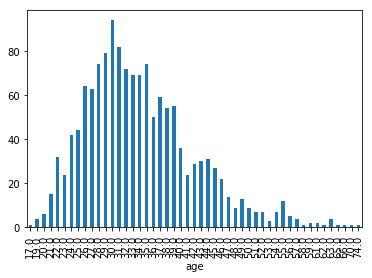

In [83]:
# df16.groupby('age')['mental_health_consequence'].describe()[30.0]

df16.groupby('age').size().plot(kind='bar')
# quantiles


In [84]:
cs = df16[cdc].tail(1)[1432]
cs

'Obsessive-Compulsive Disorder|Eating Disorder (Anorexia, Bulimia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Anxiety Disorder (Generalized, Social, Phobia, etc)'

In [85]:
import re

In [86]:
def conditions_from_str(fullstr, cset):
    for c in cset:
        if c in fullstr:
            print c

In [87]:
conditions_from_str(cs, survey_opts)

Anxiety Disorder (Generalized, Social, Phobia, etc)
Mood Disorder (Depression, Bipolar Disorder, etc)
Obsessive-Compulsive Disorder
Eating Disorder (Anorexia, Bulimia, etc)


In [88]:
df16.ix[0:0]

,self_employed,num_employees,tech_company,tech_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,gender,live_in_country,live_in_state,work_in_country,work_in_state,position,remote_work,gender_category,state,country
0,0,26-100,1.0,NaN,doesnt_apply,NaN,no,no,dont_know,very_easy,...,Male,united_kingdom,NaN,united_kingdom,NaN,Back-end Developer,sometimes,male,NaN,United Kingdom


In [89]:
b = df16[[cdc,cbc,pdc]].head(3).copy()
b

,current_diagnosed_conditions,current_believed_conditions,professional_diagnoses
0,NaN,NaN,"Anxiety Disorder (Generalized, Social, Phobia,..."
1,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,..."
2,NaN,NaN,NaN


In [90]:
# col_question_map

In [91]:
print col_question_map['current_disorder']
print col_question_map['current_diagnosed_conditions']
print col_question_map[cbc]
print
print col_question_map['professional_diagnosed']
print col_question_map['professional_diagnoses']


Do you currently have a mental health disorder?
If yes, what condition(s) have you been diagnosed with?
If maybe, what condition(s) do you believe you have?

Have you been diagnosed with a mental health condition by a medical professional?
If so, what condition(s) were you diagnosed with?


In [92]:
# split column string on |
# map each segment to a column name or other based on condition in string
def condition_list(cstring):
    clist = cstring.split('|')
    return clist


def get_category_for_segment(segstr):
    condition_map = {
        'addict': 'addictive_disorder',
        'anxi': 'anxiety_disorder',
        'deficit disorder': 'add',
        'add': 'add',
        'hyperactivity': 'adhd',
        'adhd': 'adhd',
        'dissociative': 'dissociative_disorder',
        'eating': 'eating_disorder',
        'mood': 'mood_disorder',
        'depress': 'mood_disorder',
        'bipolar': 'mood_disorder',
        'obsess': 'ocd',
        'personality': 'personality_disorder',
        'traumatic': 'ptsd',
        'stress disorder': 'ptsd',
        'ptsd': 'ptsd',
        'psychot': 'psychotic_disorder',
        'schiz': 'psychotic_disorder',
        'stress response': 'stress_response_syndromes',
        'substance': 'substance_use_disorder',
        'asperg': 'autism_spectrum',
        'autism': 'autism_spectrum',
        'pdd': 'pdd_nos',
        'pervasive': 'pdd_nos'
    }
    for k in condition_map:
        if k in segstr.lower():
            return condition_map[k]
    print segstr.lower()
    return 'other'
    
# def set_choice_cols_in_df(data, choice_set, col):
#     def set_condition_cols_in_row(row):
#         if type(row[col]) == float:
#             return 0
#         elif choice in row[col]:
#             return 1
#         else:
#             return 0
        
#     new_col = "choice_" + choice
#     data[new_col] = 0
#     data[new_col] = data.apply(set_choice, axis=1)
#     return data[new_col] 

# set_choice_cols_in_df(data, choice_set, col):
b
    

,current_diagnosed_conditions,current_believed_conditions,professional_diagnoses
0,NaN,NaN,"Anxiety Disorder (Generalized, Social, Phobia,..."
1,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,"Anxiety Disorder (Generalized, Social, Phobia,..."
2,NaN,NaN,NaN


In [93]:
cs

'Obsessive-Compulsive Disorder|Eating Disorder (Anorexia, Bulimia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Anxiety Disorder (Generalized, Social, Phobia, etc)'

In [94]:
css = condition_list(cs)
css.append('autism')
css.append('pants')

In [95]:
cats = get_category_for_segment(css[2])
cats

'mood_disorder'

In [96]:
print get_category_for_segment(css[4])
print get_category_for_segment(css[5])

autism_spectrum
pants
other


In [97]:
col_question_map


{'age': 'What is your age?',
 'anonymity': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'benefits': 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'care_options': 'Do you know the options for mental health care available under your employer-provided coverage?',
 'coworkers': 'Would you feel comfortable discussing a mental health disorder with your coworkers?',
 'current_believed_conditions': 'If maybe, what condition(s) do you believe you have?',
 'current_diagnosed_conditions': 'If yes, what condition(s) have you been diagnosed with?',
 'current_disorder': 'Do you currently have a mental health disorder?',
 'family_history': 'Do you have a family history of mental illness?',
 'friends_family': 'How willing would you be to share with friends and family that you have a mental illness?',
 'gender': 'What is your gender?',
 'hurt_career': 'Do you fee